In [5]:
import pandas as pd 

In [6]:
df=pd.read_csv("D:\jupyter\dataset\insurance.csv")
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [7]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [8]:
import seaborn as sns

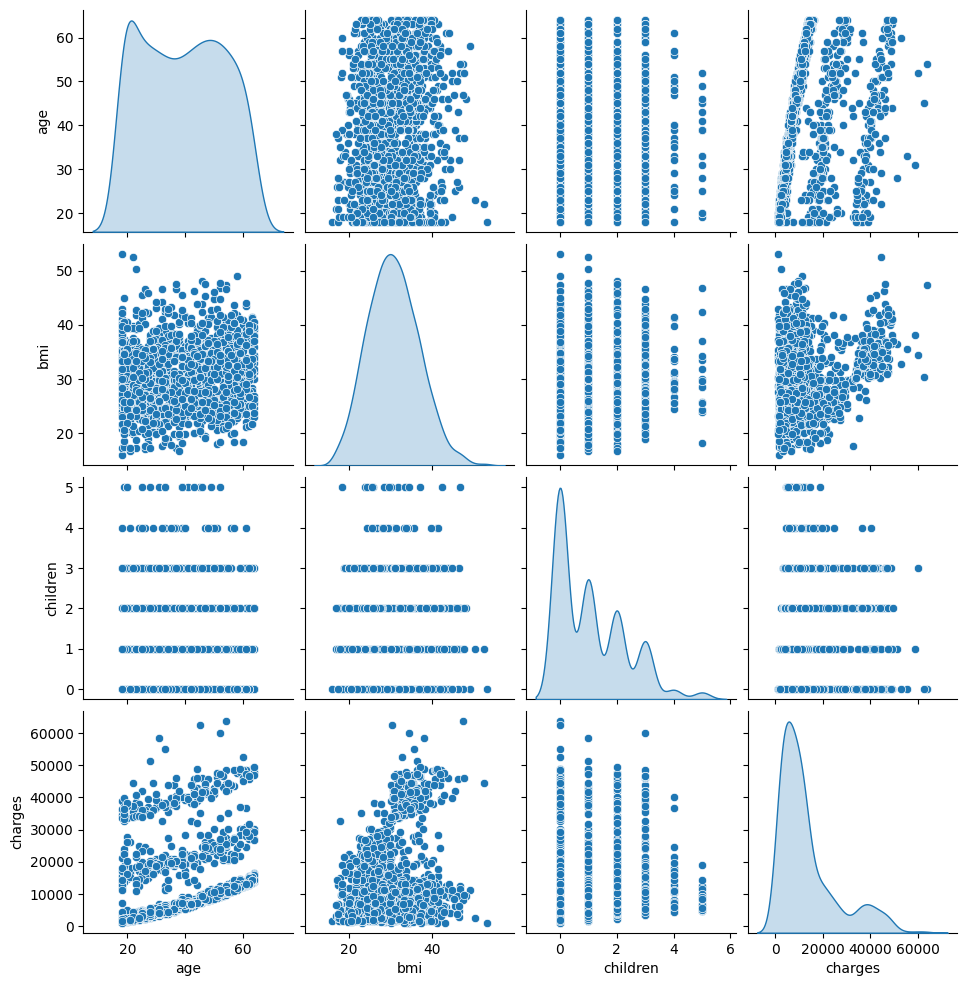

In [9]:
sns.pairplot(data=df, diag_kind='kde')

<Axes: >

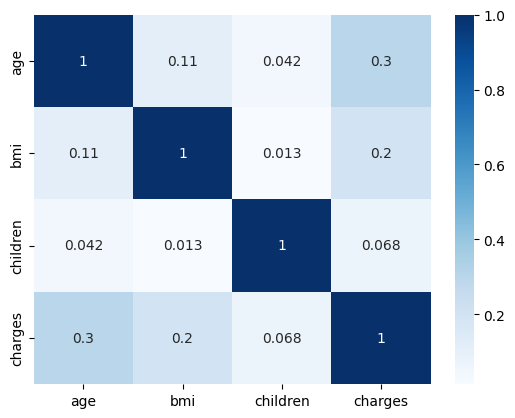

In [10]:
sns.heatmap(df[['age', 'bmi', 'children', 'charges']].corr(), cmap='Blues', annot=True)

In [11]:
# df['sex']=df['sex']=='male'
# df['sex']=df['sex'].astype(int)
df.sex.replace(to_replace=['male','female'],value=[1,0], inplace=True)

In [8]:
# df['smoker']=df['smoker']=='yes'
# df['smoker']=df['smoker'].astype(int)
df.replace({'smoker':{'yes':1,'no':0}},inplace=True)

In [9]:
df.value_counts('region')

region
southeast    364
northwest    325
southwest    325
northeast    324
dtype: int64

In [10]:
df.replace({'region':{'southwest':0,'southeast':1,'northwest':2,'northeast':3}},inplace=True)

In [11]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,0,16884.92400
1,18,1,33.770,1,0,1,1725.55230
2,28,1,33.000,3,0,1,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520


In [12]:
X=df.drop('charges',axis=1)
y=df['charges']

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)
print(X_train.shape,X_test.shape,y_train.shape,y_test.shape)

(1070, 6) (268, 6) (1070,) (268,)


In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [17]:
from sklearn.metrics import r2_score

In [18]:
y_pred_train=model.predict(X_train)
train_score=r2_score(y_train,y_pred_train)
train_score

0.7519923667088932

In [19]:
score=r2_score(y_test,y_pred)
score

0.7445422986536502

In [20]:
from xgboost import XGBRegressor

In [21]:
modelx=XGBRegressor()
modelx.fit(X_train,y_train)
y_pred_2=modelx.predict(X_test)

In [22]:
score_x=r2_score(y_test,y_pred_2)
score_x

0.8243853030772594

In [23]:
import matplotlib.pyplot as plt

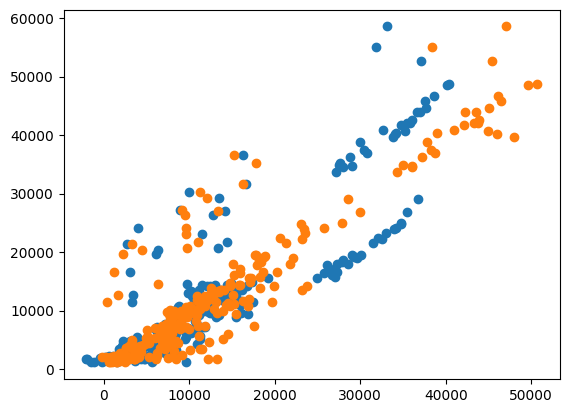

In [24]:
plt.scatter(y_pred,y_test)
plt.scatter(y_pred_2,y_test)

In [25]:
import numpy as np

In [26]:
input=(19,0,27.9,0,1,0)
# input=(31,0,25.74,0,0,0)
# input=(28,1,33,3,0,1)
input_np_array = np.asarray(input)
input_reshaped=input_np_array.reshape(1,-1)
prediction = modelx.predict(input_reshaped)
print("the estimated price of your insurance will be : ",prediction[0])

the estimated price of your insurance will be :  17124.408


XGBregression is Predecting better than Linear regression .

Making our model better

In [27]:
from sklearn.cluster import KMeans

In [28]:
features = ['age', 'bmi', 'smoker', 'children', 'region']
km = KMeans(n_clusters=2)
km.fit(df[features])
df['cust_type'] = km.predict(df[features])
df['north']=df.region.apply(lambda x: 1 if x>=2 else 0)
df['south']=df.region.apply(lambda x: 1 if x<2 else 0)
df['more_than_1_child']=df.children.apply(lambda x:1 if x>1 else 0)


c:\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [29]:
df.head()

,age,sex,bmi,children,smoker,region,charges,cust_type,north,south,more_than_1_child
0,19,0,27.900,0,1,0,16884.92400,1,0,1,0
1,18,1,33.770,1,0,1,1725.55230,1,0,1,0
2,28,1,33.000,3,0,1,4449.46200,1,0,1,1
3,33,1,22.705,0,0,2,21984.47061,1,1,0,0
4,32,1,28.880,0,0,2,3866.85520,1,1,0,0


In [30]:
X_new = df.drop(['children','region','charges'],axis=1)
y_new = df['charges']
X_new.head()

,age,sex,bmi,smoker,cust_type,north,south,more_than_1_child
0,19,0,27.900,1,1,0,1,0
1,18,1,33.770,0,1,0,1,0
2,28,1,33.000,0,1,0,1,1
3,33,1,22.705,0,1,1,0,0
4,32,1,28.880,0,1,1,0,0


In [31]:
X_train_new,X_test_new,y_train_new,y_test_new=train_test_split(X_new,y_new,test_size=0.2,random_state=42)

In [32]:
X_train_new

,age,sex,bmi,smoker,cust_type,north,south,more_than_1_child
560,46,0,19.950,0,0,1,0,1
1285,47,0,24.320,0,0,1,0,0
1142,52,0,24.860,0,0,0,1,0
969,39,0,34.320,0,1,0,1,1
486,54,0,21.470,0,0,1,0,1
...,...,...,...,...,...,...,...,...
1095,18,0,31.350,0,1,1,0,1
1130,39,0,23.870,0,1,0,1,1
1294,58,1,25.175,0,0,1,0,0
860,37,0,47.600,1,1,0,1,1


In [33]:
model_new=LinearRegression()
model_new.fit(X_train_new,y_train_new)

LinearRegression()

In [34]:
y_new_pred = model_new.predict(X_test_new)

In [35]:
score_after_changes = r2_score(y_test_new,y_new_pred)
score_after_changes

0.7840862200792053

In [36]:
input=(19,0,27.9,1,0,0,0,1)
# input=(31,0,25.74,0,0,0)
# input=(28,1,33,3,0,1)
input_np_array = np.asarray(input)
input_reshaped=input_np_array.reshape(1,-1)
prediction = model_new.predict(input_reshaped)
print("the estimated price of your insurance will be : ",prediction[0])

the estimated price of your insurance will be :  26314.22153739706


c:\Python311\Lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [37]:
df.head()

,age,sex,bmi,children,smoker,region,charges,cust_type,north,south,more_than_1_child
0,19,0,27.900,0,1,0,16884.92400,1,0,1,0
1,18,1,33.770,1,0,1,1725.55230,1,0,1,0
2,28,1,33.000,3,0,1,4449.46200,1,0,1,1
3,33,1,22.705,0,0,2,21984.47061,1,1,0,0
4,32,1,28.880,0,0,2,3866.85520,1,1,0,0


In [38]:
modelx_new=XGBRegressor()
modelx_new.fit(X_train_new,y_train_new)
y_pred_x_new=modelx_new.predict(X_test_new)

In [39]:
score_on_modelx_after_changes = r2_score(y_test_new,y_pred_x_new)
score_on_modelx_after_changes 

0.8443600816432509

In [40]:
# input=(19,0,27.9,1,0,0,0,1)
input=(18,1,33.770,0,0,0,0,1)
input_np_array = np.asarray(input)
input_reshaped=input_np_array.reshape(1,-1)
prediction = modelx_new.predict(input_reshaped)
print("the estimated price of your insurance will be : ",prediction[0])

the estimated price of your insurance will be :  2910.2673


In [41]:
df.head()

,age,sex,bmi,children,smoker,region,charges,cust_type,north,south,more_than_1_child
0,19,0,27.900,0,1,0,16884.92400,1,0,1,0
1,18,1,33.770,1,0,1,1725.55230,1,0,1,0
2,28,1,33.000,3,0,1,4449.46200,1,0,1,1
3,33,1,22.705,0,0,2,21984.47061,1,1,0,0
4,32,1,28.880,0,0,2,3866.85520,1,1,0,0


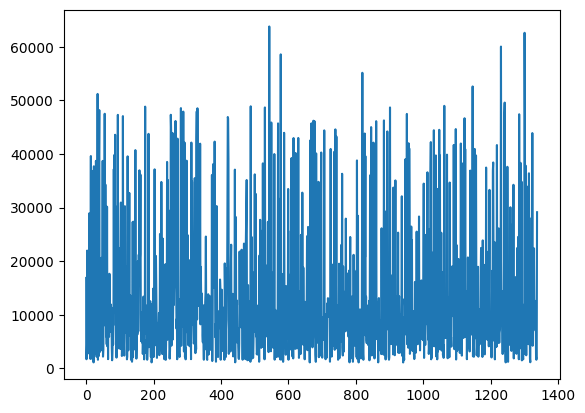

In [49]:
# charges = np.asarray(df["charges"])
# plt.plot(charges)
plt.plot(df['charges'])